In [1]:
import nltk
from gensim.models import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 


stopwords = set(stopwords.words('english'))
symbols   = ['.', ',', '’','“','”','"', "''" ,"'",'*','``', '**','$','http','https','%','&','-','--',"''",'""','?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"'s","'m","n't"]
stopwords.update(symbols)

In [2]:
time_filter = 'year'
keywords  = 'hot'#"fund"
data = pd.read_csv('./Reddit Data/keywords_'+ time_filter + '_'+ keywords +'.csv')

In [3]:
data

,Date,Name,Score,Title,Content
0,2019-09-01,MasterCookSwag,269,Formal posting guidelines for political topics...,"Alright everyone, it looks like we had pretty ..."
1,2020-04-02,AutoModerator,18,Daily Advice Thread - All basic help or advice...,"If your question is ""I have $10,000, what do I..."
2,2020-04-02,hasbs,5437,My Broker (Questrade) called the police on me ...,This is kind of part 3 of what's been happenin...
3,2020-04-02,cassiusclayd,1321,Initial Jobless Claims for Week Ending March 2...,"In the week ending March 28, the advance figur..."
4,2020-04-03,pikindaguy,69,Bloomberg: Mortgage Defaults Could Pile Up at ...,https://www.bloomberg.com/news/articles/2020-0...
...,...,...,...,...,...
925,2020-03-23,2020_GR78,18,Covid-19 effect on housing market,My wife and I were already planning on buying ...
926,2020-03-24,thevedgehead,0,Property is currently crashing,Expect prices to follow. How many of you are ...
927,2020-03-23,legitqu,69,UK financial regulator asks public companies t...,https://www.ft.com/content/b98956ba-6c21-11ea-...
928,2020-03-23,OkIllGetReddit,6,Basically just wanting to ask you guys when yo...,I think it's unfair to ask a question without ...


In [4]:
data = data.dropna()
print("Total available data :",len(data))
filtered_title = []
filtered_content = []
for title, content in zip(data['Title'], data['Content']):
    filtered_title.append([word for word in word_tokenize(title.lower()) if word not in stopwords])
    filtered_content.append([word for word in word_tokenize(content.lower()) if word not in stopwords])


Total available data : 886


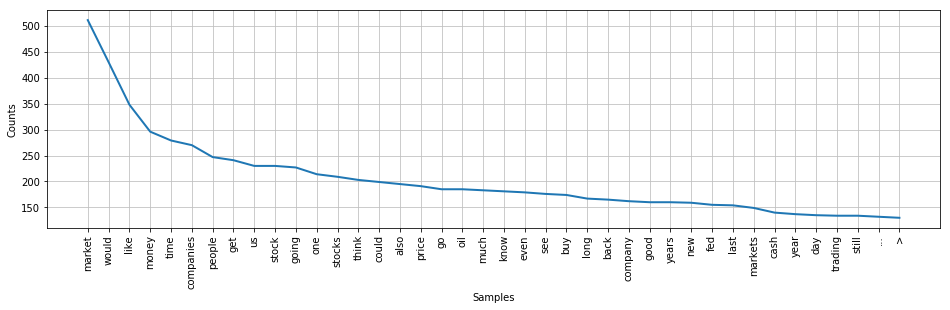

In [5]:
all_filtered_content = sum(filtered_content, [])
fdist_content = nltk.FreqDist(all_filtered_content)
plt.figure(figsize=(16,4))
fdist_content.plot(40,cumulative=False)

In [6]:
df_content = pd.DataFrame.from_dict(fdist_content, orient='index')
df_content.columns = ['Counts']
df_content = df_content.sort_values(by=['Counts'], ascending=False)
df_content

,Counts
market,511
would,430
like,348
money,296
time,279
...,...
evglx,1
rm,1
-85,1
evmlx,1


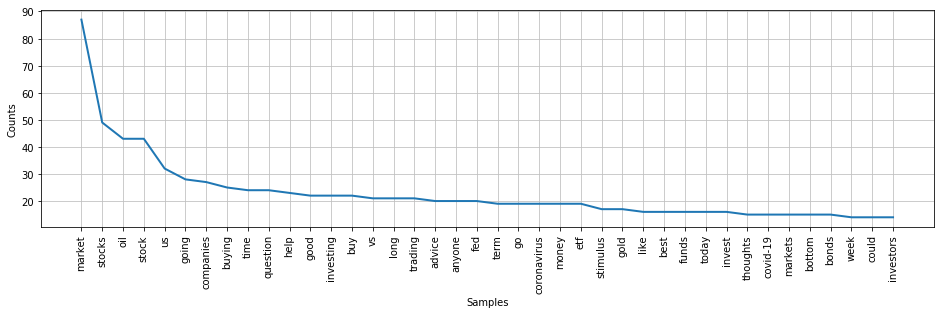

In [7]:
all_filtered_title = sum(filtered_title, [])
fdist_title = nltk.FreqDist(all_filtered_title)
plt.figure(figsize=(16,4))
fdist_title.plot(40,cumulative=False)

In [8]:
df_title = pd.DataFrame.from_dict(fdist_title, orient='index')
df_title.columns = ['Counts']
df_title = df_title.sort_values(by=['Counts'], ascending=False)
df_title

,Counts
market,87
stocks,49
oil,43
stock,43
us,32
...,...
forgive,1
commands,1
52,1
rose,1
